In [1]:
library(Seurat)
library(ggplot2)
library(data.table)

Attaching SeuratObject



In [2]:
#### Load counts and annotations for Batch #1, COH100 ####------------------
COH100.counts <- fread("./COH100_txt", header=T)
COH100.annot <- read.delim("./COH100_metadata.txt", header=T, fill=T)

In [3]:
dim(COH100.counts)
dim(COH100.annot)

[1] 32738 89614

[1] 89611    11

In [4]:
rownames(COH100.counts)[1:10]
colnames(COH100.counts)[1:10]

[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10"

[1] "Gene"                       "Gene ID"                   
 [3] "Gene Symbol"                "17387-12A_AAACGAAGTACTAGCT"
 [5] "17387-12A_AAACGAATCAAGTGGG" "17387-12A_AAACGAATCCTCTGCA"
 [7] "17387-12A_AAACGAATCGACGATT" "17387-12A_AAACGCTCAAAGAGTT"
 [9] "17387-12A_AAACGCTCATGTGCCG" "17387-12A_AAACGCTGTAGGTACG"

In [5]:
gids <- COH100.counts$`Gene Symbol`
x <- which(gids != "")
dup <- which(duplicated(gids[x]))
x <- x[-dup]

COH100.counts <- COH100.counts[x, 4:ncol(COH100.counts)]
COH100.counts <- as.matrix(COH100.counts)
rownames(COH100.counts) <- gids[x]

In [6]:
dim(COH100.counts)
dim(COH100.annot)

[1] 22999 89611

[1] 89611    11

In [7]:
rownames(COH100.annot)<- COH100.annot$Cell

In [8]:
#### Create Seurat object ####
COH100.seurat <- CreateSeuratObject(COH100.counts, min.cells = 3, min.features = 50, meta.data = COH100.annot)

Warning message:
“The following arguments are not used: row.names”


In [9]:
rm(COH100.counts)
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,2872332,153.4,5527425,295.2,5527425,295.2
Vcells,441581514,3369.0,3557376756,27140.7,4396482063,33542.5


In [10]:
dim(COH100.seurat) 
mean(COH100.seurat$Percent.Mitochondria) 
median(COH100.seurat$Percent.Mitochondria)

[1] 20645 89609

[1] 20.61574

[1] 14.5

In [11]:
options(repr.plot.width = 9, repr.plot.height = 6, repr.plot.res = 100)

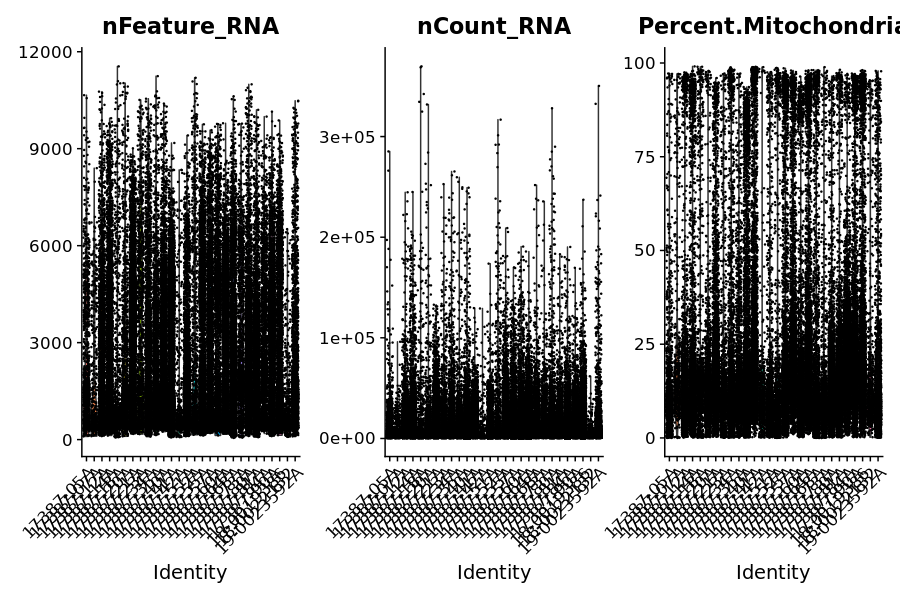

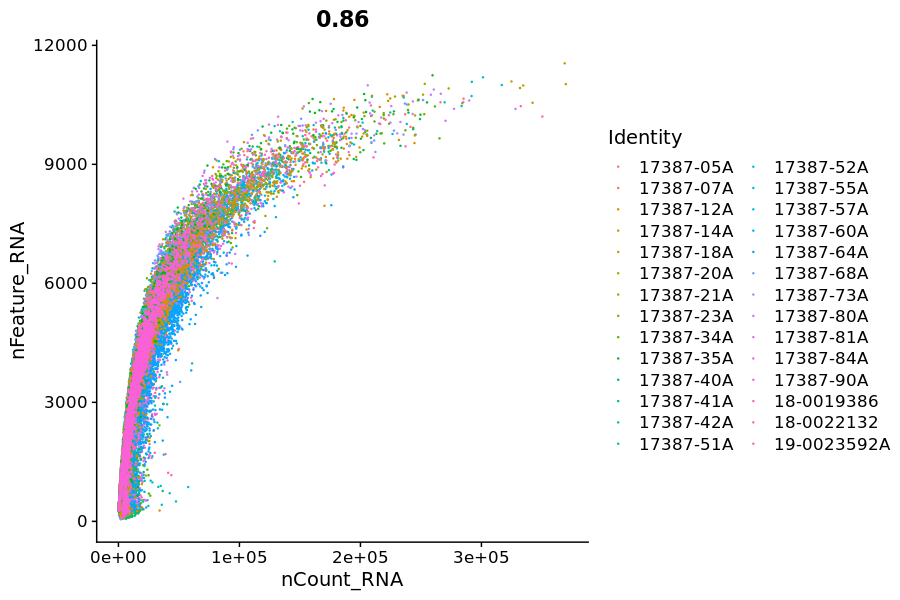

In [12]:
#### QC Plots before filtering ####
VlnPlot(COH100.seurat, features = c("nFeature_RNA", "nCount_RNA", "Percent.Mitochondria"), ncol = 3, pt.size = 0.2)
FeatureScatter(COH100.seurat, feature1 = "nCount_RNA", feature2 = "nFeature_RNA", pt.size = 0.2)

In [13]:
#### Export plots pre-filtering ####
pdf("./Figures/COH100.Seurat.PreQC.pdf", width=16, height=12)
VlnPlot(COH100.seurat, features = c("nFeature_RNA", "nCount_RNA", "Percent.Mitochondria"), ncol = 3, pt.size = 0.2)
FeatureScatter(COH100.seurat, feature1 = "nCount_RNA", feature2 = "nFeature_RNA", pt.size = 0.2)
par(mar=c(6,8,3,2))
barplot(table(COH100.seurat$Sample), horiz = T, las=2)
dev.off()

png 
  2

In [14]:
#### Filter ####
COH100.seurat <- subset(x=COH100.seurat, 
                       nCount_RNA > 1000 & 
                       nCount_RNA < 80000 & 
                       nFeature_RNA > 500 &
                       Percent.Mitochondria < 50)

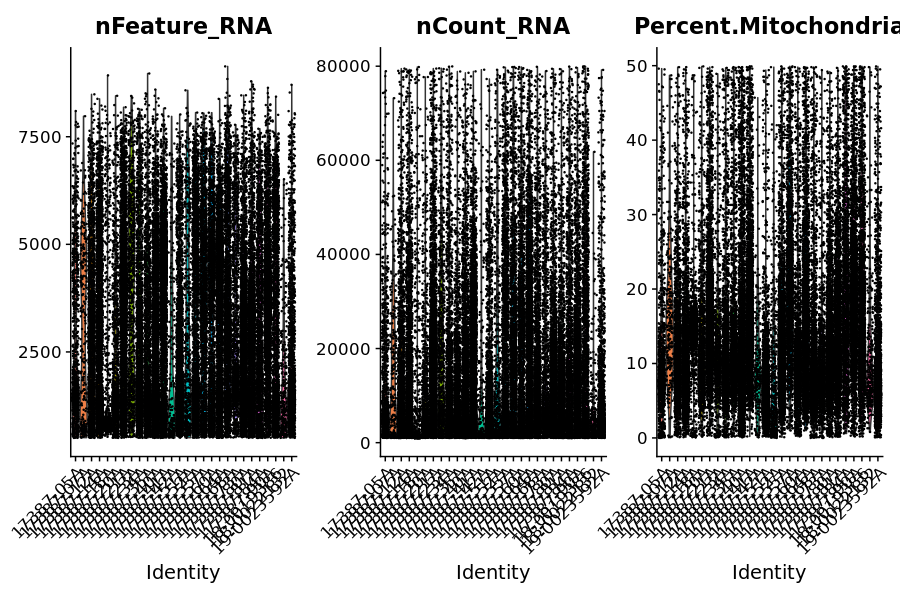

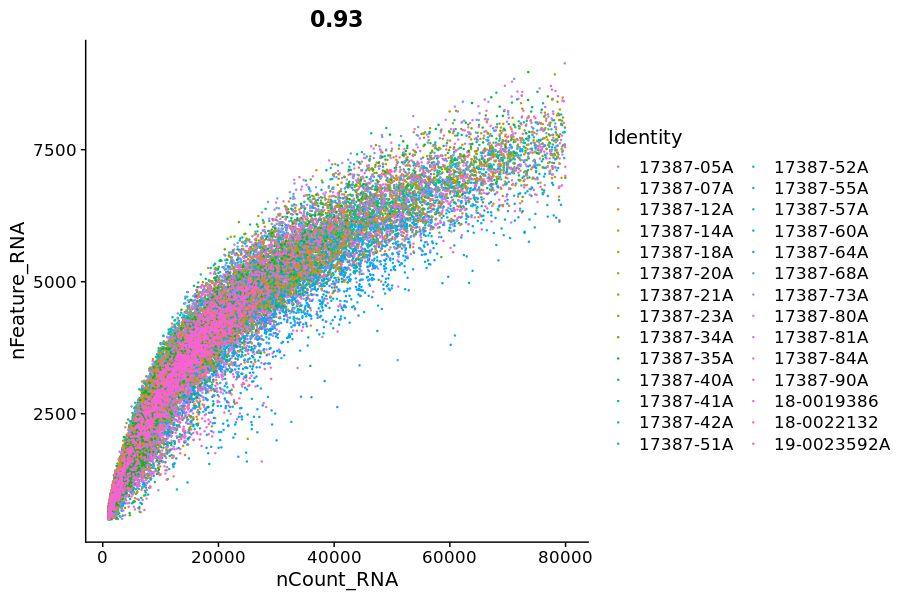

In [15]:
#### QC Plots after filtering ####
VlnPlot(COH100.seurat, features = c("nFeature_RNA", "nCount_RNA", "Percent.Mitochondria"), ncol = 3, pt.size = 0.2)
FeatureScatter(COH100.seurat, feature1 = "nCount_RNA", feature2 = "nFeature_RNA", pt.size = 0.2)

In [16]:
pdf("./Figures/COH100.Seurat.AfterQC.pdf", width=16, height=12)
VlnPlot(COH100.seurat, features = c("nFeature_RNA", "nCount_RNA", "Percent.Mitochondria"), ncol = 3, pt.size = 0.2)
FeatureScatter(COH100.seurat, feature1 = "nCount_RNA", feature2 = "nFeature_RNA", pt.size = 0.2)
par(mar=c(6,8,3,2))
barplot(table(COH100.seurat$Sample), horiz = T, las=2)
dev.off()

png 
  2

In [17]:
dim(COH100.seurat)

[1] 20645 52797

In [89]:
#saveRDS(COH100.seurat, file="COH100.seurat.RDS")

In [18]:
library(qs)

qs v0.25.1.



In [19]:
qsave(COH100.seurat, "COH100.seurat_v2.qs", nthreads=16)